In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

1) Workflow\
Para esse exercício, será necessário carregar discursos presidenciais feitos por Dilma e Temer em parte de seus mandatos:

In [2]:
link = 'https://github.com/FLS-6497/datasets/raw/main/aula5/discursos_presidenciais.csv'
discursos = pd.read_csv(link, sep=';')

a) Pré-processamento\
Usando ferramentas de processamento de texto, implemente uma pequena pipeline para limpar dados e, quando estiver satisfeito com ela, crie uma função que aplique ela em uma nova lista textos.

In [3]:
X = discursos.discurso
y = discursos.presidente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

vec = CountVectorizer(
        stop_words=stopwords.words('portuguese'),
        token_pattern=r"(?u)\b\w\w\w+\b",
        analyzer='word', 
        ngram_range=(1, 2), 
        min_df=0.1
)

X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(419, 1165)
(180, 1165)


b) Modelo\
Usando os frameworks de aprendizado de máquina, use a bag of words criada anteriormente para treinar algum modelo de classificação para predizer o nome do ou da presidente que proferiu cada discurso na amostra de teste.

In [4]:
X_train = X_train.toarray()
X_test = X_test.toarray()

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

(y_test == y_pred).sum() / len(y_test)

0.9666666666666667

c) Validação\
Roda o item pedido em b) 100 vezes e salve os resultados de alguma métrica de validação.

<AxesSubplot:ylabel='Count'>

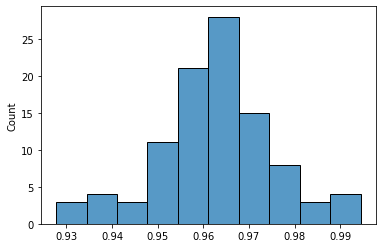

In [22]:
def get_nb_accuracy():
    X   = discursos.discurso
    y = discursos.presidente

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    vec = CountVectorizer(
            stop_words=stopwords.words('portuguese'),
            analyzer='word', 
            ngram_range=(1, 2), 
            min_df=0.1
    )

    X_train = vec.fit_transform(X_train)
    X_test = vec.transform(X_test)

    X_train = X_train.toarray()
    X_test = X_test.toarray()

    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
        
    accuracy_matrix = confusion_matrix(y_test, y_pred)
    TP = accuracy_matrix[0,0]
    FP = accuracy_matrix[1,0]
    TN = accuracy_matrix[1,1]
    FN = accuracy_matrix[0,1]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy
    
    return accuracy

accuracy = [get_nb_accuracy() for i in range(100)]
sns.histplot(accuracy)

2) Validação\
Como vimos, pré-processamento deve ser aplicado antes de fazermos split sample de validação (i.e., criar amostras de teste e de treino). Agora, implemente um workflow que leva isso em conta. Para tanto, você deverá criar uma função que separe textos em treino e teste, que aplique pré-processamento apenas na amostra de treino e que, depois, replique ele na amostra de teste para, então, rodar um algoritmo e calcular alguma métrica de validação.

3) Benchmark\
Usando as ferramentas que vimos, experimente com os seguintes pré-processamentos:
- Usando apenas palavras maiores do que 4 caracteres;
- Removendo palavras que não ocorrem em, pelo menos, 10 documentos;
- Removendo palavras que não ocorrem em, pelo menos, 10% dos documentos;
- Usando TF-IDF para normalizar os elementos da matriz bag of words;

<AxesSubplot:ylabel='Count'>

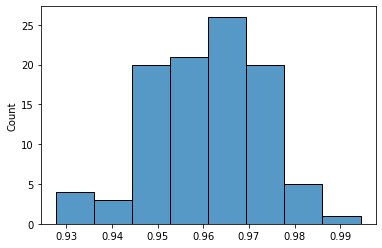

In [24]:
def get_nb_accuracy_4():
    X   = discursos.discurso
    y = discursos.presidente

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    vectorizer = TfidfVectorizer(
        stop_words=stopwords.words('portuguese'),
        token_pattern=r"(?u)\b\w\w\w+\b",
        analyzer='word', 
        ngram_range=(1, 2), 
        min_df=0.1
    )

    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    X_train = X_train.toarray()
    X_test = X_test.toarray()

    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    accuracy_scr = accuracy_score(y_test, y_pred)
    return accuracy_scr

accuracy = [get_nb_accuracy() for i in range(100)]
sns.histplot(accuracy)